# Изучение информации из базы данных StackOverflow

Вы будете работать с базой данных StackOverflow — сервиса вопросов и ответов о программировании. StackOverflow похож на социальную сеть — пользователи сервиса задают вопросы, отвечают на посты, оставляют комментарии и ставят оценки другим ответам.
Вы будете работать с версией базы, где хранятся данные о постах за 2008 год, но в таблицах вы найдёте информацию и о более поздних оценках, которые эти посты получили. 

ER-диаграмма базы данных:

![Текст с описанием картинки](ER.png)

## Настройки рабочей тетради

In [1]:
#Импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine 

### Конфигурация для подключения к базе данных


Создание подключения

In [3]:
engine = create_engine(connection_string) 

# Задание 1 ✔

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [4]:
# напишите запрос
query = '''
SELECT
    DISTINCT(CAST(DATE_TRUNC('month', post.creation_date) AS date)) AS month_date,
    SUM(views_count) OVER (PARTITION BY CAST(DATE_TRUNC('month', post.creation_date) AS date)) AS total_views
FROM stackoverflow.posts AS post
ORDER BY total_views DESC
'''

# выполните запрос
question_1 = pd.read_sql_query(query, con=engine) 
display(question_1)

,month_date,total_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?

[Text(0.5, 1.0, 'График роста количества просмотров по месяцам за 2008 год'),
 Text(0, 0.5, 'Количество просмотров'),
 Text(0.5, 0, 'Месяц')]

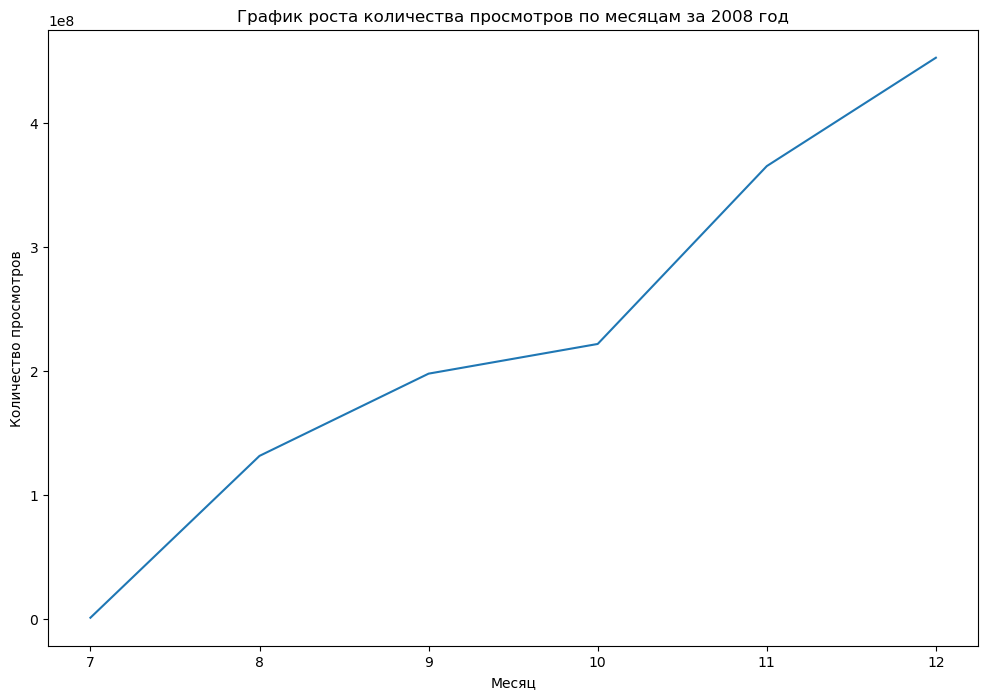

In [5]:
question_1['month_date'] = pd.to_datetime(question_1['month_date'], format='%Y-%m-%d')
plt.figure(figsize=(12, 8))
plt.plot(range(7, 13), question_1['total_views'].sort_values())
plt.gca().set(title='График роста количества просмотров по месяцам за 2008 год', ylabel='Количество просмотров', xlabel='Месяц')

<b>Ответ</b>

Данные предоставлены лишь за полгода, наименьшее значение равно примерно 670 тыс. просмотров, что довольно немного, примерно по 22 тыс. в день, в следующий месяц кол-во просмотров уже почти в 2 раза больше, кроме того, наблюдается значительно высокий рост общего количества просмотров постов на сайте - за полгода рассматриваемый показатель повысился в 67 раз, т.е., по сути, рост популярности сайта. Эти данные говорят о том, что в июле 2008 года stackoverflow только начинал свою деятельность, поэтому так быстро росло количество просмотров - всё больше людей узнавали о сайте и переходили на него, искали ответы на вопросы

# Задание 2 ✔

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [6]:
# напишите запрос
query = '''
select us.display_name AS names,
    COUNT(DISTINCT post.user_id)
FROM stackoverflow.users AS us
JOIN stackoverflow.posts AS post ON us.id=post.user_id
JOIN stackoverflow.post_types AS pt ON pt.id=post.post_type_id
WHERE pt.type = 'Answer'
AND post.creation_date <= us.creation_date + INTERVAL '1 months'

GROUP BY 1
HAVING COUNT(pt.type) > 100
ORDER BY 1
'''

# выполните запрос
question_2 = pd.read_sql_query(query, con=engine)
display(question_2)

,names,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
71,leppie,1
72,lomaxx,1
73,mattlant,1
74,paxdiablo,1


Какие аномалии наблюдаются в данных? О чём они говорят?

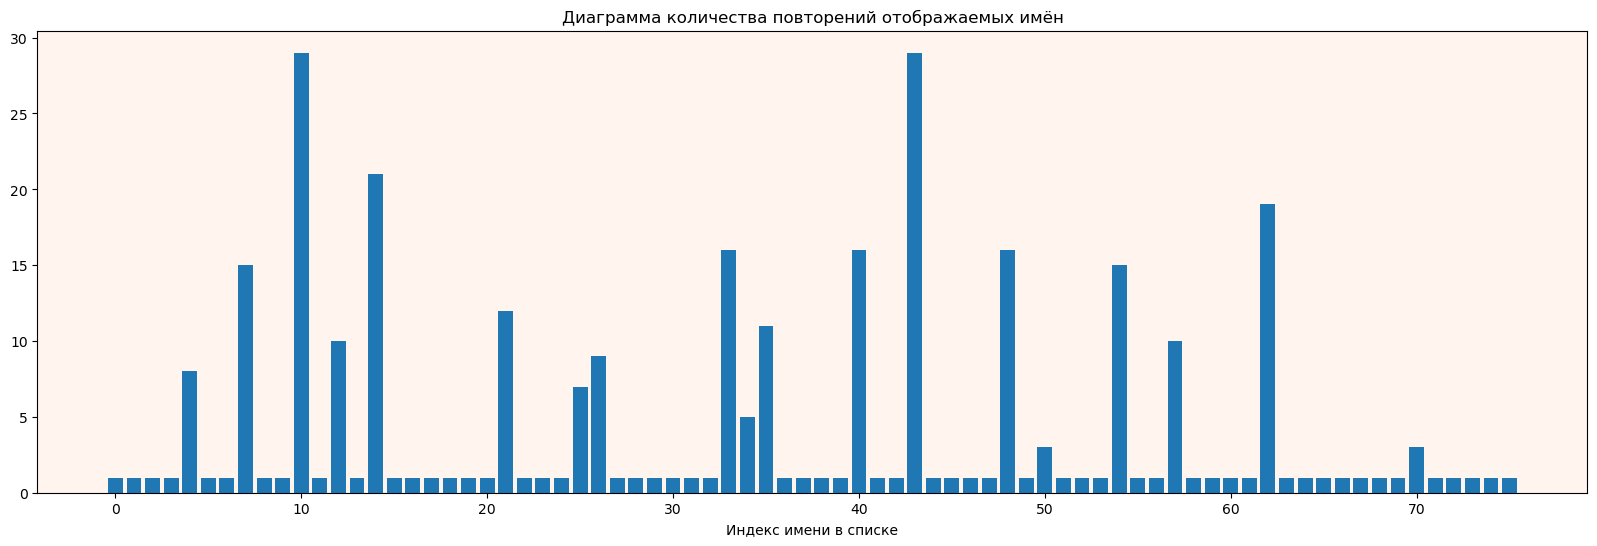

In [7]:
# напишите ваш ответ здесь 

fig, ax = plt.subplots()

ax.bar(question_2['names'].index, question_2['count'])
ax.set_title('Диаграмма количества повторений отображаемых имён')
ax.set_xlabel('Индекс имени в списке')
ax.set_facecolor('seashell')
fig.set_figwidth(20)
fig.set_figheight(6)

plt.show()

In [8]:
print(question_2['names'].unique())
print(question_2.loc[[10, 43], 'names'])

['1800 INFORMATION' 'Adam Bellaire' 'Adam Davis' 'Adam Liss' 'Alan'
 'Amy B' 'Ben Hoffstein' 'Brian' 'Cade Roux' 'CesarB' 'Chris'
 'ConcernedOfTunbridgeWells' 'Craig' 'Dale Ragan' 'Dan' 'Eric Z Beard'
 'Espo' 'FlySwat' 'Franci Penov' 'GEOCHET' 'GateKiller' 'Greg'
 'Gulzar Nazim' 'Ilya Kochetov' 'James Curran' 'Jim' 'Joe' 'Joel Coehoorn'
 'Johannes Schaub - litb' 'John Millikin' 'Jon Limjap' 'Jon Skeet'
 'Jorge Ferreira' 'Josh' 'Keith' 'Kevin' 'Kibbee' 'Konrad Rudolph'
 'Lasse Vågsæther Karlsen' 'Marc Gravell' 'Mark' 'Mark Cidade'
 'Mark Harrison' 'Matt' 'Matt Hamilton' 'Michael Burr' 'Michael Stum'
 'Mitchel Sellers' 'Nick' 'Norman Ramsey' 'Oli' 'Orion Edwards'
 'Paul Nathan' 'PhiLho' 'Rob' 'Rob Cooper' 'Rob Walker' 'Ryan' 'S.Lott'
 'Sklivvz' 'Steven A. Lowe' 'TheSmurf' 'Tom' 'Vilx-' 'Vinko Vrsalovic'
 'aku' 'anjanb' 'dkretz' 'frankodwyer' 'gbjbaanb' 'jfs' 'leppie' 'lomaxx'
 'mattlant' 'paxdiablo' 'tzot']
10    Chris
43     Matt
Name: names, dtype: object


<b>Вывод</b>

Как мы видим из графика, одно имя могут иметь сразу несколько пользователей, у некоторых имен число владельцев доходит до 30. Это происходит из-за того, что пользователи выбирают в качестве отображаемого имени не никнейм или комбинацию "первое имя + второе имя"(имя, фамилия), а только имя, поэтому мы видим, что наиболее распротранены такие отображаемые имена как: Chris, Matt, Nick и т.д.

То есть заметна тенденция среди активных пользователей подписываться своим первым именем.

# Задание 3 ✔

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [9]:
# напишите запрос
query = '''
WITH table_1 AS (SELECT
                    DISTINCT(us.id) as usid,
                    COUNT(post.id) OVER (PARTITION BY us.id) AS dec_count
                FROM stackoverflow.users AS us
                JOIN stackoverflow.posts AS post ON us.id=post.user_id
                WHERE post.creation_date BETWEEN '2008-12-01' AND '2009-01-01')

SELECT
    DISTINCT(CAST(DATE_TRUNC('month', post.creation_date) AS date)) AS months,
    COUNT(post.id) OVER (PARTITION BY CAST(DATE_TRUNC('month', post.creation_date) AS date))
FROM stackoverflow.posts AS post
JOIN stackoverflow.users AS us ON us.id=post.user_id
JOIN table_1 ON table_1.usid=us.id
WHERE us.creation_date BETWEEN '2008-09-01' AND '2008-10-01'
AND post.creation_date BETWEEN '2008-01-01' AND '2009-01-01'
AND table_1.dec_count > 0
ORDER BY months DESC
'''

# выполните запрос
question_3 = pd.read_sql_query(query, con=engine)
display(question_3)

,months,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


Изучите данные: есть ли в них аномалии? Предположите, почему могли появиться аномальные значения.

<b>Вывод</b>

Аномальными можно считать: количество постов за август и падение количества постов в ноябре-декабре. 

Как мы выяснили в задании 1, сайт начал свою работу лишь в июле 2008, и, естественно, в начале активности на сайте было минимум, пока о нем знали лишь в узком кругу людей, потом о сайте узнало большое количество людей и количество постов кратно выросло. Отсюда резкий скачок с 32 постов за август до 24870 за сентябрь.

Этим же можно и объяснить падение в полтора раза в ноябре: первые пару месяцев о сайте узнавало всё больше людей, рекламная кампания сайта (если она была) только начинала свою деятельность, однако через небольшое время всё меньше новых людей стали приходить (или рекламная кампания достигла пика распространения в выбранной области), при этом какая-то часть тех, кто пришел в первые два месяца, уходила и поэтому количество постов снизилось - сначала возник большой интерес к новому продукту, и со временем он падал.

# Задание 4 ✔

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [10]:
# напишите запрос
query = '''
SELECT
    post.user_id,
    post.creation_date,
    post.views_count,
    SUM(post.views_count) OVER (Partition by post.user_id ORDER BY post.creation_date)
FROM stackoverflow.posts AS post
ORDER BY post.user_id, post.creation_date
'''

# выполните запрос
question_4 = pd.read_sql_query(query, con=engine)
display(question_4)

,user_id,creation_date,views_count,sum
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


# Задание 5 ✔

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [11]:
# напишите запрос
query = '''
WITH table_1 AS
        (SELECT
            uid,
            days,
            COUNT(days) AS per_day
        FROM (SELECT
                    post.user_id AS uid,
                    CAST(DATE_TRUNC('day', post.creation_date) AS date) AS days,
                    COUNT(post.id) OVER (PARTITION BY post.user_id, CAST(DATE_TRUNC('day', post.creation_date) AS date))
            FROM stackoverflow.posts AS post
            WHERE post.creation_date BETWEEN '2008-08-01' AND '2008-09-01') AS table_1
        GROUP BY uid, days
        ORDER BY uid, days)

SELECT
    uid,
    SUM(per_day) / COUNT(per_day) AS avg_daily
FROM table_1
GROUP BY uid
HAVING SUM(per_day) > 120
ORDER BY avg_daily
'''

# выполните запрос
question_5 = pd.read_sql_query(query, con=engine)
display(question_5)

,uid,avg_daily
0,116,4.777778
1,234,5.208333
2,91,5.681818
3,905,7.000000
4,383,7.277778


# Задание 6 ✔

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [12]:
# напишите запрос
query = '''
WITH table_1 AS
(SELECT
    DISTINCT(post.user_id) AS uid,
    COUNT(CAST(DATE_TRUNC ('day', post.creation_date) AS date)) OVER (PARTITION BY post.user_id, CAST(DATE_TRUNC ('day', post.creation_date) AS date)) AS dayss
FROM stackoverflow.posts AS post
WHERE post.creation_date BEtwEEN '2008-12-01' AND '2008-12-08'
ORDER BY uid)

SELECT
   ROUND(SUM(dayss)/COUNT(DISTINCT(uid)))AS result
FROM table_1 
'''

# выполните запрос
question_6 = pd.read_sql_query(query, con=engine)
display(question_6)

,result
0,2.0


Проанализируйте итоговую таблицу — какие выводы можно сделать?

<b>Вывод</b>

В рассматриваемый период, в среднем, пользователи проявляли активность лишь 2 дня из 7 рассматриваемых, т.е. один человек публиковал посты только в 2 дня из 7, что вполне логично, учитывая специфику сайта - Q&A - люди приходят за ответом на вопрос и, получая ответ, уходят. Исходя из этого, можно предположить, что на получение нужного ответа в среднем уходит около суток обсуждения темы.

# Задание 7 ✔

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [13]:
# напишите запрос
query = '''
SELECT
    post.user_id,
    post.creation_date,
    CASE
        WHEN LAG(EXTRACT(MONTH FROM CAST(post.creation_date AS timestamp)), 2, NULL) OVER (PARTITION BY post.user_id ORDER BY post.creation_date) = 1 THEN 'January'
        WHEN LAG(EXTRACT(MONTH FROM CAST(post.creation_date AS timestamp)), 2, NULL) OVER (PARTITION BY post.user_id ORDER BY post.creation_date) = 2 THEN 'February'
        WHEN LAG(EXTRACT(MONTH FROM CAST(post.creation_date AS timestamp)), 2, NULL) OVER (PARTITION BY post.user_id ORDER BY post.creation_date) = 3 THEN 'March'
        WHEN LAG(EXTRACT(MONTH FROM CAST(post.creation_date AS timestamp)), 2, NULL) OVER (PARTITION BY post.user_id ORDER BY post.creation_date) = 4 THEN 'April'
        WHEN LAG(EXTRACT(MONTH FROM CAST(post.creation_date AS timestamp)), 2, NULL) OVER (PARTITION BY post.user_id ORDER BY post.creation_date) = 5 THEN 'May'
        WHEN LAG(EXTRACT(MONTH FROM CAST(post.creation_date AS timestamp)), 2, NULL) OVER (PARTITION BY post.user_id ORDER BY post.creation_date) = 6 THEN 'June'
        WHEN LAG(EXTRACT(MONTH FROM CAST(post.creation_date AS timestamp)), 2, NULL) OVER (PARTITION BY post.user_id ORDER BY post.creation_date) = 7 THEN 'July'
        WHEN LAG(EXTRACT(MONTH FROM CAST(post.creation_date AS timestamp)), 2, NULL) OVER (PARTITION BY post.user_id ORDER BY post.creation_date) = 8 THEN 'August'
        WHEN LAG(EXTRACT(MONTH FROM CAST(post.creation_date AS timestamp)), 2, NULL) OVER (PARTITION BY post.user_id ORDER BY post.creation_date) = 9 THEN 'September'
        WHEN LAG(EXTRACT(MONTH FROM CAST(post.creation_date AS timestamp)), 2, NULL) OVER (PARTITION BY post.user_id ORDER BY post.creation_date) = 10 THEN 'October'
        WHEN LAG(EXTRACT(MONTH FROM CAST(post.creation_date AS timestamp)), 2, NULL) OVER (PARTITION BY post.user_id ORDER BY post.creation_date) = 11 THEN 'November'
        WHEN LAG(EXTRACT(MONTH FROM CAST(post.creation_date AS timestamp)), 2, NULL) OVER (PARTITION BY post.user_id ORDER BY post.creation_date) = 12 THEN 'December'
        ELSE NULL
    END
    
FROM stackoverflow.posts AS post

'''

# выполните запрос
question_7 = pd.read_sql_query(query, con=engine)
display(question_7)

,user_id,creation_date,case
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


# Задание 8✔

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [14]:
# напишите запрос
query = '''
WITH users AS
(SELECT
    *,
    COUNT(*) OVER (PARTITION BY dt) AS cohort_users_cnt
FROM (SELECT
        DISTINCT(post.user_id) AS uid,
        FIRST_VALUE(DATE_TRUNC('month', post.creation_date)) OVER (PARTITION BY post.user_id ORDER BY post.creation_date) AS dt
    FROM stackoverflow.posts AS post) AS subquery_1),
sessions AS
(SELECT
    user_id,
    DATE_TRUNC('month', creation_date)::date AS session_date
FROM stackoverflow.posts
GROUP BY 1,
         2)
         
SELECT
    u.dt AS cohort_dt,
    session_date,
    COUNT(u.uid) AS users_cnt,
    cohort_users_cnt,
    ROUND(COUNT(u.uid) * 100.0 / cohort_users_cnt, 2) AS retention_rate
FROM users AS u
JOIN sessions AS s ON s.user_id=u.uid
GROUP BY 1,
         2,
         4
    
'''

# выполните запрос
question_8 = pd.read_sql_query(query, con=engine)
display(question_8)

,cohort_dt,session_date,users_cnt,cohort_users_cnt,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

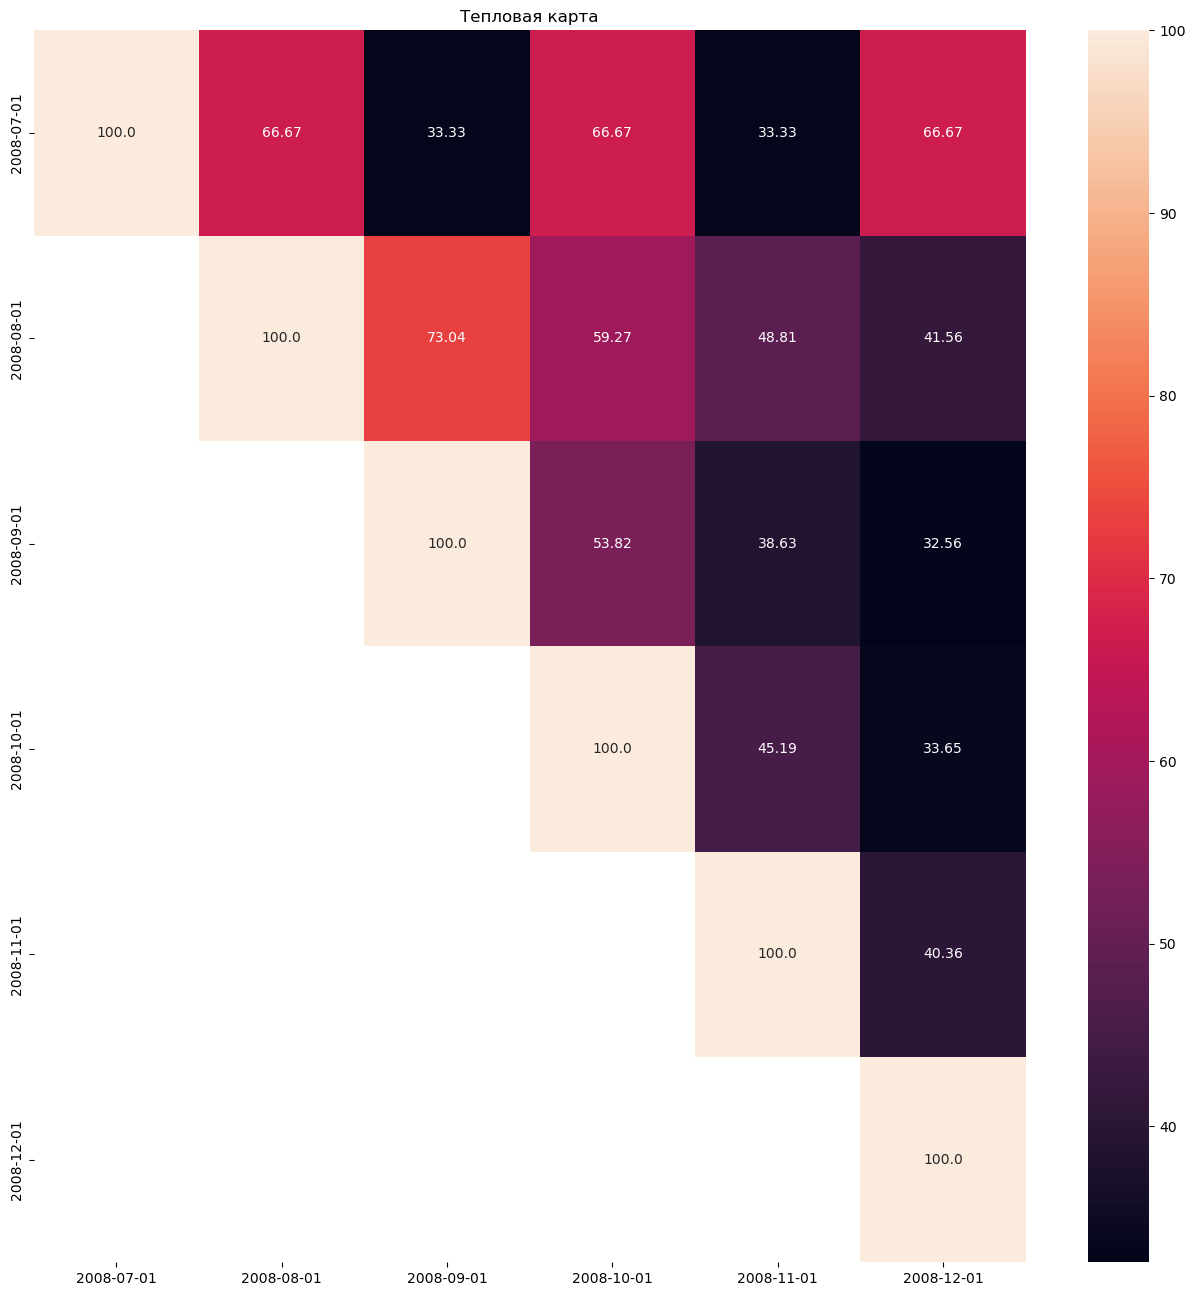

In [15]:
# постройте тепловую карту Retention Rate

# создаём сводную таблицу с результатами
retention = question_8.pivot('cohort_dt', 'session_date', 'retention_rate')
retention.index = [str(x)[0:10] for x in retention.index]
retention.columns = [str(x)[0:10] for x in retention.columns]

# строим хитмэп
plt.figure(figsize=(16, 16)) 
sns.heatmap(retention,
            annot=True,
            fmt='')
plt.title('Тепловая карта')
plt.show() 

опишите аномалии или другие необычные явления и сформулируйте гипотезы

<b>Вывод</b>

1. Первую когорту, у которых первая публикация была в июле, составляют всего 3 человека, т.е. очень малую выборку, и рассматривать её не имеет большого смысла.
2. Если рассматривать по когортам, то можно заметить, что в каждой когорте коэффициент удержания падает, что естественно при отстутвии каких-нибудь стимулирующих мероприятий, цель которых вернуть ушедших с сайта пользователей. Однако у первой большой когорты (от августа) этот коэффициент падает медленнее, чем у остальных. Это может быть связано с тем, что большую часть этой когорты составляли заинтересованные в успехе сайта пользователи(тестировщики, знакомые разработчиков и т.п.), либо с тем, что у пришедших на сайт первыми больше желания проявлять активность, тем самым продвигая ресурс, потому что они знают его "с самого зарождения" и хотят играть роль в развитии сайта.
3. Если сравнивать когорты между собой, то можно заметить, что каждый последующий месяц коэффициент удержания у новых когорт ниже, чем у когорт постарше, что также говорит об отсутствии мероприятий, направленных на удержание пользователей. Причём, учитывая численные данные из таблицы, этот коэффициент не зависит от количества или роста/падения количества пользователей, только от даты, это подтверждает гипотезу о том, что на старте было много пользователей в связи с большим интересом к новому продукту, но со временем этот интерес всё больше падал.

# Задание 9 ✔

На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.


| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [16]:
# напишите запрос
query = '''
WITH table_1 AS 
(SELECT
    DISTINCT(DATE_TRUNC('month', post.creation_date)) AS creation_month,
    COUNT(post.id) OVER (PARTITION BY DATE_TRUNC('month', post.creation_date)) AS posts_count
FROM stackoverflow.posts AS post
WHERE post.creation_date BETWEEN '2008-09-01' AND '2009-01-01')

SELECT
    *,
    ROUND((posts_count - LAG(posts_count, 1) OVER (ORDER BY creation_month)::numeric)/LAG(posts_count) OVER (ORDER BY creation_month)*100,2)
FROM table_1
'''

# выполните запрос
question_9 = pd.read_sql_query(query, con=engine)
display(question_9)

,creation_month,posts_count,round
0,2008-09-01,70371,NaN
1,2008-10-01,63102,-10.33
2,2008-11-01,46975,-25.56
3,2008-12-01,44592,-5.07


Постройте круговую диаграмму с количеством постов по месяцам.

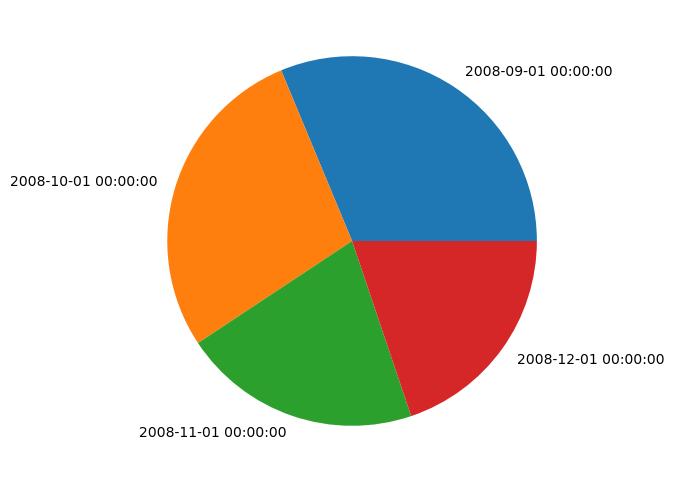

In [17]:
# постройте круговую диаграмму с количеством постов по месяцам

fig, ax = plt.subplots()

ax.pie(question_9['posts_count'], labels=question_9['creation_month'])
fig.set_figwidth(20)
fig.set_figheight(6)

plt.show()

# Задание 10 ✔

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [18]:
# напишите запрос
query = '''
WITH table_1 AS 
(SELECT
    post.creation_date,
    EXTRACT(WEEK FROM CAST(post.creation_date AS timestamp)) AS week_number
FROM stackoverflow.posts AS post
WHERE post.user_id IN (SELECT
                            post.user_id
                        FROM stackoverflow.posts AS post
                        ORDER BY COUNT(post.id) OVER (PARTITION BY post.user_id) DESC
                        LIMIT 1)
AND post.creation_date BETWEEN '2008-10-01' AND '2008-11-01')

SELECT
    DISTINCT(week_number),
    LAST_VALUE(creation_date) OVER (PARTITION BY week_number) AS dt
FROM table_1
ORDER BY dt
'''

# выполните запрос
question_10 = pd.read_sql_query(query, con=engine)
display(question_10)

,week_number,dt
0,40.0,2008-10-05 09:00:58
1,41.0,2008-10-12 21:22:23
2,42.0,2008-10-19 06:49:30
3,43.0,2008-10-26 21:44:36
4,44.0,2008-10-31 22:16:01


# Вывод

Выгружены различные данные из базы данных 

В предоставленной базе имеются данные за первые полгода работа сайта stackoverflow, с июля по декабрь 2008 года. За этот период было создано около 225 тыс. постов, больше всего постов было создано в октябре, 70 тыс. Наименьшее количество просмотров было на постах от июля - ~670 тыс., наибольшее - в сентябре, ~452 млн. 

За рассматриваемый период наблюдается стабильное падение коэффициента удержания - новые пользователи задерживаются на сайте всё меньше, старые пользователи уходят. (задание 8)

Также найдено многократное повторение отображаемого имени - например, Chris и Matt повторяются около 30 раз и это только среди активных пользователей. (задание 2)

В целом, в июле 2008 года stackoverflow только начинал свою деятельность, отсюда большой рост популярности в начале, но с каждым месяцем интерес пользователей падал. Это прослеживается как по падению коэффициента удержания (задание 8), так и по уменьшению количества создаваемых постов (задание 9).